In [16]:
using Plots
theme(:dracula, lw=2)

In [19]:
x = [-pi:0.1:pi;]
y1 = sin.(x)
y2 = cos.(x)


63-element Vector{Float64}:
 -1.0
 -0.9950041652780257
 -0.9800665778412415
 -0.9553364891256061
 -0.9210609940028851
 -0.8775825618903726
 -0.8253356149096782
 -0.7648421872844883
 -0.6967067093471655
 -0.6216099682706644
  ⋮
 -0.6346928759426347
 -0.7086697742912601
 -0.7755658785102502
 -0.8347127848391599
 -0.8855195169413194
 -0.9274784307440359
 -0.9601702866503661
 -0.9832684384425847
 -0.9965420970232175

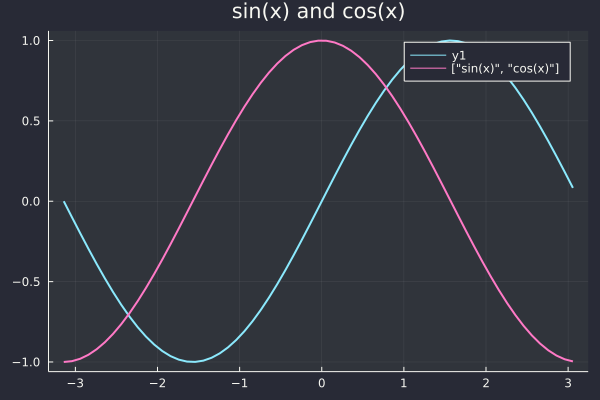

In [23]:
plot(x, y1, label="sin(x)")
plot!(x, y2, title = "sin(x) and cos(x)", label = ["sin(x)", "cos(x)"])